In [16]:
import shutil, os

train_folder = r"C:\Users\ASUS\Desktop\Digital\Emoji-Detection-System\FER-2013_sampled\FER-2013_sampled\train_balanced_7000"
for bad in ("train_corrupt_found", "train_duplicates_found"):
    path = os.path.join(train_folder, bad)
    if os.path.isdir(path):
        shutil.rmtree(path)


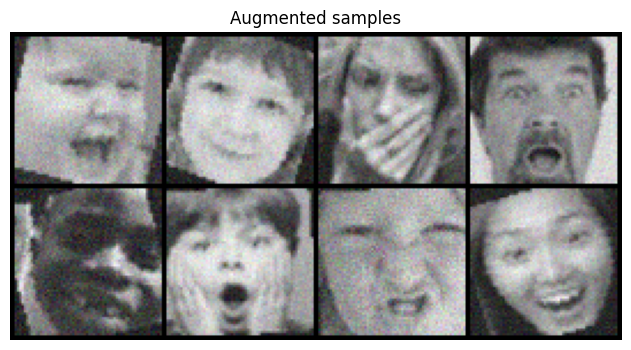

In [23]:
import torch
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
train_transforms = T.Compose([
    T.RandomRotation(20),
    T.RandomResizedCrop(64, scale=(0.9,1.1)),
    T.RandomHorizontalFlip(),
    T.ColorJitter(brightness=0.2, contrast=0.2),
    T.ToTensor(),
    T.Lambda(lambda x: x + 0.05*torch.randn_like(x)),  # Gaussian noise
    T.Normalize(mean=[0.5]*3, std=[0.5]*3)
])
train_folder = r"C:\Users\ASUS\Desktop\Digital\Emoji-Detection-System\FER-2013_sampled\FER-2013_sampled\train_balanced_7000"
valid_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
train_ds = ImageFolder(
    train_folder,
    transform=train_transforms,
    is_valid_file=lambda x: any(cls in x for cls in valid_classes)
)
train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
imgs, labels = next(iter(train_loader))
grid = make_grid(imgs, nrow=4, normalize=True, scale_each=True)
plt.figure(figsize=(8,4))
plt.imshow(grid.permute(1,2,0))
plt.axis('off')
plt.title("Augmented samples")
plt.show()

In [5]:
pip install torchvision



   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 4.1 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/212.5 MB ? eta -:--:--
   ---------------------------------------- 1.3/212.5 MB 3.4 MB/s eta 0:01:02
   ---------------------------------------- 2.1/212.5 MB 3.6 MB/s eta 0:00:59
    --------------------------------------- 3.1/212.5 MB 3.7 MB/s eta 0:00:57
    --------------------------------------- 3.9/212.5 MB 3.7 MB/s eta 0:00:56
    --------------------------------------- 4.7/212.5 MB 3.8 MB/s eta 0:00:56
   - -------------------------------------- 5.5/212.5 MB 3.8 MB/s eta 0:00:55
   - -------------------------------------- 6.3/212.5 MB 3.8 MB/s eta 0:00:55
   - ---------